In [1]:
## Praca Domowa 2 


In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import string as st
import math
import sklearn
import plotly 
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv("allegro-api-transactions.csv") 
data

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,420015,2016-04-03 20:27:13,6099625607,"['RTV i AGD', 'Sprzęt audio dla domu', 'Odtwar...",0,0,iwona7012,180.00,0,0,0,176,Kraśnik,RTV i AGD
420016,420016,2016-04-03 22:35:02,6099634607,"['Uroda', 'Makijaż', 'Oczy', 'Tusze do rzęs']",1,1,Dolce_Cosmetics,14.99,1,2,0,34851,Dzierżoniów,Uroda
420017,420017,2016-04-03 22:38:57,6099780407,"['Odzież, Obuwie, Dodatki', 'Przebrania, kosti...",1,1,pewex4all,5.99,1,470,0,983,Supraśl,"Odzież, Obuwie, Dodatki"
420018,420018,2016-04-03 22:44:17,6099801007,"['Dla Dzieci', 'Rowery i pojazdy', 'Rowery bie...",1,0,kostasia,200.00,0,0,0,163,Poznań,Dla Dzieci


In [4]:


# na początek może warto zauważyć ,że zmienna taka jak ip (w zasadzie nr wiersza) jest zupełnie nie 
# informatywna i do jakiegoś konkretnego zadania należało by ją usunąć 

# Kodowanie zmiennych 

In [5]:
# Target encoding zmiennej it_location
# Na początek trochę poprawię kolumnę it_location 
data.it_location = data.it_location.str.lower()



import category_encoders
te=category_encoders.target_encoder.TargetEncoder(data,cols='it_location')

encoded_te = te.fit_transform(X=data,y=data.price)

encoded_te

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,84.132898,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,84.132898,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,64.883187,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,35.433365,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,73.772916,"Odzież, Obuwie, Dodatki"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,420015,2016-04-03 20:27:13,6099625607,"['RTV i AGD', 'Sprzęt audio dla domu', 'Odtwar...",0,0,iwona7012,180.00,0,0,0,176,26.346402,RTV i AGD
420016,420016,2016-04-03 22:35:02,6099634607,"['Uroda', 'Makijaż', 'Oczy', 'Tusze do rzęs']",1,1,Dolce_Cosmetics,14.99,1,2,0,34851,63.645927,Uroda
420017,420017,2016-04-03 22:38:57,6099780407,"['Odzież, Obuwie, Dodatki', 'Przebrania, kosti...",1,1,pewex4all,5.99,1,470,0,983,18.682800,"Odzież, Obuwie, Dodatki"
420018,420018,2016-04-03 22:44:17,6099801007,"['Dla Dzieci', 'Rowery i pojazdy', 'Rowery bie...",1,0,kostasia,200.00,0,0,0,163,104.254805,Dla Dzieci


In [6]:
encoded_te
# Podstawowa przewaga target encodignu nad one-hote encodingiem polega na możliwości kodowania 
# zminnych o dużej liczbie kategorii bez dodawania kolumn do danych 
np.count_nonzero(np.unique(data.it_location))

7903

In [7]:
# Jak widać dla zastowowania kodowania one-hote potrzeba by 10000 dodatkowych kolumn co jest 
# absolutnie nie do przyjęcia. W tej konkretnej sytuacij zastosowanie one-hote bez wcześniejszej 
# obróbki zmiennej jest zupełnie nie możliwe (a przynajmniej BARDZO pamięciożerne).



In [8]:
# Encoding zmiennej main_category

# One-hote encoding

oh = category_encoders.one_hot.OneHotEncoder(data,cols='main_category')
encoded_oh = oh.fit_transform(data)
encoded_oh
# Tworzy po jednej kolumnie dla każdej unikalnej wartości zmiennej gdzie 1 oznacza ,że dana wartość 
# wystepowała w tym wierszu a 0 ,że nie. 
# Kodowanie stworzyło 28 nowych kolumn znacząco zwiększając rozmiar danych (ponad 2 krotnie)
# raczej nie zbyt dobry sposób zakodowania danych 

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,...,main_category_18,main_category_19,main_category_20,main_category_21,main_category_22,main_category_23,main_category_24,main_category_25,main_category_26,main_category_27
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,...,0,0,0,0,0,0,0,0,0,0
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,...,0,0,0,0,0,0,0,0,0,0
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,...,0,0,0,0,0,0,0,0,0,0
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,...,0,0,0,0,0,0,0,0,0,0
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,420015,2016-04-03 20:27:13,6099625607,"['RTV i AGD', 'Sprzęt audio dla domu', 'Odtwar...",0,0,iwona7012,180.00,0,0,...,0,0,0,0,0,0,0,0,0,0
420016,420016,2016-04-03 22:35:02,6099634607,"['Uroda', 'Makijaż', 'Oczy', 'Tusze do rzęs']",1,1,Dolce_Cosmetics,14.99,1,2,...,0,0,0,0,0,0,0,0,0,0
420017,420017,2016-04-03 22:38:57,6099780407,"['Odzież, Obuwie, Dodatki', 'Przebrania, kosti...",1,1,pewex4all,5.99,1,470,...,0,0,0,0,0,0,0,0,0,0
420018,420018,2016-04-03 22:44:17,6099801007,"['Dla Dzieci', 'Rowery i pojazdy', 'Rowery bie...",1,0,kostasia,200.00,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# James-Stein Encoder 
js =category_encoders.james_stein.JamesSteinEncoder(data,cols='main_category')
encoded_js = js.fit_transform(data,data.price)
encoded_js
# Na początek należy zauważyć ,że ten sposób kodowania nie tworzy dodatkowych kolumn. 


encoded_js

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,warszawa,101.735793
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,warszawa,75.894257
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,leszno,73.179117
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,wola krzysztoporska,25.346202
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,białystok,75.894257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,420015,2016-04-03 20:27:13,6099625607,"['RTV i AGD', 'Sprzęt audio dla domu', 'Odtwar...",0,0,iwona7012,180.00,0,0,0,176,kraśnik,97.729828
420016,420016,2016-04-03 22:35:02,6099634607,"['Uroda', 'Makijaż', 'Oczy', 'Tusze do rzęs']",1,1,Dolce_Cosmetics,14.99,1,2,0,34851,dzierżoniów,28.654868
420017,420017,2016-04-03 22:38:57,6099780407,"['Odzież, Obuwie, Dodatki', 'Przebrania, kosti...",1,1,pewex4all,5.99,1,470,0,983,supraśl,75.894257
420018,420018,2016-04-03 22:44:17,6099801007,"['Dla Dzieci', 'Rowery i pojazdy', 'Rowery bie...",1,0,kostasia,200.00,0,0,0,163,poznań,71.814470


# Sposób działania 
Dla określonej unikalnej wartości z kodowanego wektora **X** przypisuje średnią ważoną postaci:  <br />

X<sub>i</sub> = (1-B)mean(Y<sub>i</sub>) + Bmean(Y) gdzie:  <br />
Y - wektor bedący naszym targetem   <br />
Y<sub>i</sub> - zmienne z wektora Y dla których X ma wartosć X<sub>i</sub>   <br />
Oraz B = var(Y<sub>i</sub>) / (var(Y<sub>i</sub>)+var(Y)/count(Y))

In [10]:
# Ordinal Encoder
od= category_encoders.ordinal.OrdinalEncoder(data,cols='main_category')
encoder_od = od.fit_transform(data)
encoder_od

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,warszawa,1
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,warszawa,2
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,leszno,3
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,wola krzysztoporska,4
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,białystok,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,420015,2016-04-03 20:27:13,6099625607,"['RTV i AGD', 'Sprzęt audio dla domu', 'Odtwar...",0,0,iwona7012,180.00,0,0,0,176,kraśnik,6
420016,420016,2016-04-03 22:35:02,6099634607,"['Uroda', 'Makijaż', 'Oczy', 'Tusze do rzęs']",1,1,Dolce_Cosmetics,14.99,1,2,0,34851,dzierżoniów,9
420017,420017,2016-04-03 22:38:57,6099780407,"['Odzież, Obuwie, Dodatki', 'Przebrania, kosti...",1,1,pewex4all,5.99,1,470,0,983,supraśl,2
420018,420018,2016-04-03 22:44:17,6099801007,"['Dla Dzieci', 'Rowery i pojazdy', 'Rowery bie...",1,0,kostasia,200.00,0,0,0,163,poznań,8


In [11]:
# Ten encoder przypisuje kazdej unikalnej wartości kodowanej zmiennej liczbę naturalną 
# może być użyteczny kiedy np. istnieje naturalna kolejność kategroii.



# Uzupełnianie braków 


In [12]:
# Wybór właściwych kolumn 
data1 = data[['price','it_seller_rating','it_quantity']]
data1 = data1[0:50000]
# Na początek przygotujemy funkcje która losowa usuwa 10% rekordów z wybranych kolumn 
def var_remove(dane,columns):
    
    df = dane.copy(deep=True )
    
    n = len(df.iloc[:,1])

    for i in columns:
        samp = np.random.choice(n-1, math.floor(0.1*n),replace=False)
        new = df[i]
        new[samp]= None 
        df[i] = new 
    return df 


In [13]:
# Funkcja oblicznjąca RMSE 
def RMSE(data_original,data_calculated):
    rmse = (((data_original - data_calculated) ** 2).mean() ** .5)
    return rmse
    
    

In [14]:
from sklearn.impute import KNNImputer
# Funkcja przeprowadzająca test dla Nearest neighbors imputation dla konkretnego k 

def test(data,k,columns_na):
    rmse = []
    
    for i in range(10):
        data_to_use = var_remove(data,columns_na)
        imputer = KNNImputer(n_neighbors=k, weights="uniform")
        data_input = pd.DataFrame(imputer.fit_transform(data_to_use),columns=["price", "it_seller_rating","it_quantity"])
        rmse.append(RMSE(data.it_seller_rating,data_input.it_seller_rating))
      
    
    std = np.array(rmse).std()
    return [rmse,std]
    

In [97]:
# Testy 
# wyniki  zapisane w plikach 
"""
# Test dla różnych k 
rmse_matrix = []
std_vec = []
for k in range(3,11):
    
    d=test(data1,k,['it_seller_rating'])
    rmse_matrix.append(d[0])
    std_vec.append(d[1])

    
# Test dla 2 kolumn z usuniętymi wartościami 
rmse_matrix1 = []
std_vec1 = []
for k in range(3,11):
    
    d=test(data1,k,['it_seller_rating','it_quantity'])
    rmse_matrix1.append(d[0])
    std_vec1.append(d[1])
    
beep(30)
"""

"\n# Test dla różnych k \nrmse_matrix = []\nstd_vec = []\nfor k in range(1,31):\n    \n    d=test(data1,k,['it_seller_rating'])\n    rmse_matrix.append(d[0])\n    std_vec.append(d[1])\n\n    \n# Test dla 2 kolumn z usuniętymi wartościami \nrmse_matrix1 = []\nstd_vec1 = []\nfor k in range(1,31):\n    \n    d=test(data1,k,['it_seller_rating','it_quantity'])\n    rmse_matrix1.append(d[0])\n    std_vec1.append(d[1])\n   \n"

In [132]:
# zapisywnaie danych 
"""
rmsedf1 = pd.DataFrame(rmse_matrix)
rmsedf1 = rmsedf1.iloc[2:10]
rmsedf1.to_csv(r'one_column_rmse.csv', index = False)

rmsedf2 = pd.DataFrame(rmse_matrix1)
rmsedf2.to_csv(r'two_column_rmse.csv', index = False)

sd1 = pd.DataFrame(std_vec)
sd1=sd1.iloc[2:10]
sd1.to_csv(r'std_one_col.csv',index=False)

sd2 = pd.DataFrame(std_vec1)
sd2.to_csv(r'std_two_col.csv',index=False)
"""

In [15]:
# wczytwyanie danych
rmsd_matrix_1 =pd.read_csv('one_column_rmse.csv')
rmsd_matrix_2 = pd.read_csv('two_column_rmse.csv')
sd_1 = pd.read_csv('std_one_col.csv')
sd_2 = pd.read_csv('std_two_col.csv')

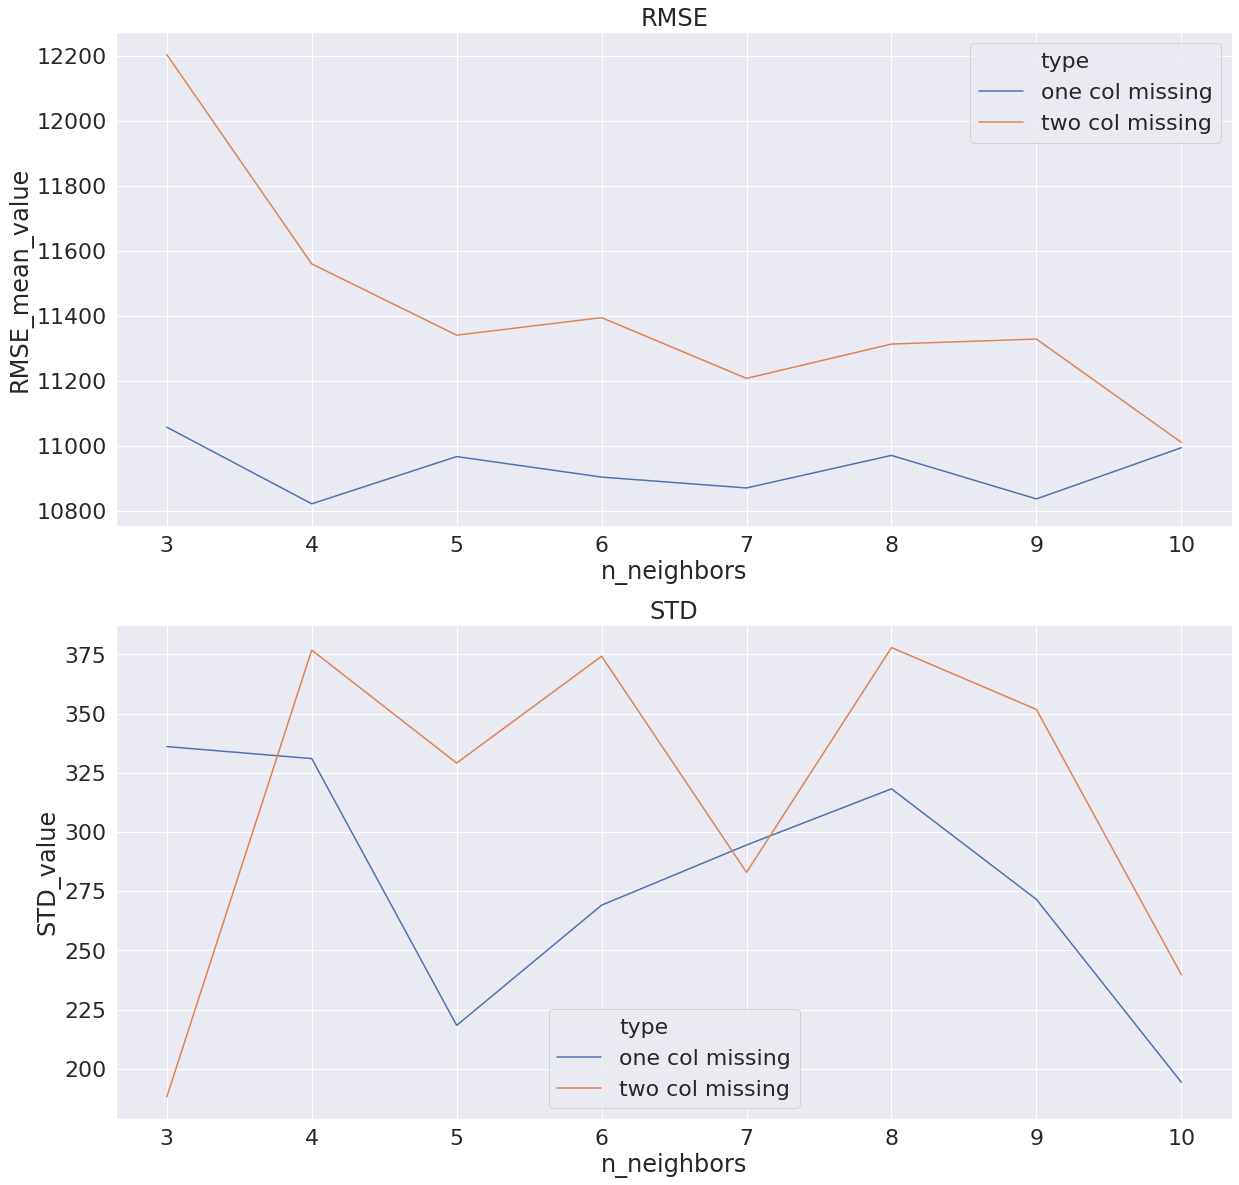

In [81]:
# Wykresy i omównenie danych
# Przygotownaie danych do wykresu rmse
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,20


data_plot =np.concatenate((np.array(rmsd_matrix_1.mean(axis=1)),np.array(rmsd_matrix_2.mean(axis=1))))
data_plot1 = np.concatenate((np.repeat('one col missing',8),np.repeat('two col missing',8)))
k = np.concatenate((np.arange(3,11),np.arange(3,11)))
data__plot = pd.DataFrame({'type':data_plot1,'RMSE_mean_value':data_plot,'n_neighbors':k})
# przygotowanie danych do wykresu std 
data_std = np.concatenate((np.array(sd_1.iloc[:,0]),np.array(sd_2.iloc[:,0])))
data_std_plot = pd.DataFrame({'type':data_plot1,'STD_value':data_std,'n_neighbors':k})

sns.set(font_scale=2)

fig, axs = plt.subplots(ncols=1,nrows=2)

plot1 = sns.lineplot(x="n_neighbors",y='RMSE_mean_value',hue="type",
                     data=data__plot,ax=axs[0]).set_title("RMSE")

plot2 = sns.lineplot(x="n_neighbors",y='STD_value',hue="type",
                     data=data_std_plot,ax=axs[1]).set_title("STD")

Wykresy prezentują się jak powyżej. Eksperyment przeprowadziłem dla róznych warotści n_neighbors aby zobaczyć wpływ tego parametru na wyniki.  <br />
1.Wykres 1 - RMSE przyjmuje wartości około 11000 ale jest wyrazie większe dla usuwania danych z dwóch kolumn. Warto też dodać ,że wraz ze wzrostem n różnica jest coraz mniejsza (większe n zapenia ,że w pobliskich wartosćiach nie będzie NaN co da wynik bliższy rzeczywistości).  <br />
2.Wykres 2 - STD wartrości RMSE przyjmuje wartości około 300 nie widać tutaj znaczącej zależności od parametru n.  <br />
Użyta metoda uzupełniania danych wydaje sie dość dobrze radzić sobie z brakiami w innych kolumnach.